In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, LinearSVR, SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'axes.titlesize': 24,
              'axes.labelsize': 20,
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'figure.figsize': (8, 4.5)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Merged_Data.csv', parse_dates = [0], index_col=[0])
df.head()

,CPI_CPI,XRP_Open,XRP_High,XRP_Low,XRP_Close,XRP_Adj Close,XRP_Volume,DJIA_DJIA,STICKY_STICKY,Ethereum_Open,...,VIX_LOW,VIX_CLOSE,real_interest_rate_10Y_real_interest_rate_10Y,SP500_SP500,BNB_Open,BNB_High,BNB_Low,BNB_Close,BNB_Adj Close,BNB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,237.477,0.0,0.0,0.0,0.0,0.0,0.0,17265.990000,1.954047,0.0,...,11.980000,12.030000,0.58086,2011.36,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-19,237.477,0.0,0.0,0.0,0.0,0.0,0.0,17279.740000,1.954047,0.0,...,11.520000,12.110000,0.58086,2010.40,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-20,237.477,0.0,0.0,0.0,0.0,0.0,0.0,17244.053333,1.954047,0.0,...,12.056667,12.636667,0.58086,2005.03,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-21,237.477,0.0,0.0,0.0,0.0,0.0,0.0,17208.366667,1.954047,0.0,...,12.593333,13.163333,0.58086,1999.66,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-22,237.477,0.0,0.0,0.0,0.0,0.0,0.0,17172.680000,1.954047,0.0,...,13.130000,13.690000,0.58086,1994.29,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['CPI_CPI', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close',
       'XRP_Adj Close', 'XRP_Volume', 'DJIA_DJIA', 'STICKY_STICKY',
       'Ethereum_Open', 'Ethereum_High', 'Ethereum_Low', 'Ethereum_Close',
       'Ethereum_Adj Close', 'Ethereum_Volume', 'Litecoin_Open',
       'Litecoin_High', 'Litecoin_Low', 'Litecoin_Close', 'Litecoin_Adj Close',
       'Litecoin_Volume', 'Bitcoin_Open', 'Bitcoin_High', 'Bitcoin_Low',
       'Bitcoin_Close', 'Bitcoin_Adj Close', 'Bitcoin_Volume', 'Cardano_Open',
       'Cardano_High', 'Cardano_Low', 'Cardano_Close', 'Cardano_Adj Close',
       'Cardano_Volume', '10Y_Inflation_10Y_Inflation', 'VIX_OPEN', 'VIX_HIGH',
       'VIX_LOW', 'VIX_CLOSE', 'real_interest_rate_10Y_real_interest_rate_10Y',
       'SP500_SP500', 'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close',
       'BNB_Adj Close', 'BNB_Volume'],
      dtype='object')

In [4]:
# df['intercept'] = 1
# vif_data = pd.DataFrame()
# vif_data["Variable"] = df.columns

# # Calculate VIF for each variable
# vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# # Display the DataFrame with VIF values
# print(vif_data)

In [5]:
df.drop(columns=['Bitcoin_Adj Close','Cardano_Adj Close','BNB_Adj Close','Ethereum_Adj Close',
                 'Litecoin_Adj Close','XRP_Adj Close'],inplace=True)
df.drop(columns=['XRP_Open', 'XRP_High',  'XRP_Low', 'Ethereum_Open', 'Ethereum_High', 'Ethereum_Low',
                 'Litecoin_Open','Litecoin_High', 'Litecoin_Low', 'Cardano_Open','Cardano_High', 'Cardano_Low',
                'BNB_Open', 'BNB_High', 'BNB_Low', 'VIX_OPEN', 'VIX_HIGH','VIX_LOW'],inplace=True)
# df.drop(columns=['CPI_CPI', 'DJIA_DJIA','SP500_SP500'],inplace=True)
# df.drop(columns=['intercept'],inplace=True)
df['Bitcoin_Close']=df['Bitcoin_Close'].shift(-1)
df = df.iloc[:-1]

In [6]:
df

,CPI_CPI,XRP_Close,XRP_Volume,DJIA_DJIA,STICKY_STICKY,Ethereum_Close,Ethereum_Volume,Litecoin_Close,Litecoin_Volume,Bitcoin_Open,...,Bitcoin_Close,Bitcoin_Volume,Cardano_Close,Cardano_Volume,10Y_Inflation_10Y_Inflation,VIX_CLOSE,real_interest_rate_10Y_real_interest_rate_10Y,SP500_SP500,BNB_Close,BNB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,237.477,0.000000,0.000000e+00,17265.990000,1.954047,0.000000,0.000000e+00,4.685230,4569260,456.859985,...,394.795990,34483200,0.000000,0.0,2.07,12.030000,0.580860,2011.36,0.000000,0.0
2014-09-19,237.477,0.000000,0.000000e+00,17279.740000,1.954047,0.000000,0.000000e+00,4.327770,3917450,424.102997,...,408.903992,37919700,0.000000,0.0,2.07,12.110000,0.580860,2010.40,0.000000,0.0
2014-09-20,237.477,0.000000,0.000000e+00,17244.053333,1.954047,0.000000,0.000000e+00,4.286440,5490660,394.673004,...,398.821014,36863600,0.000000,0.0,2.07,12.636667,0.580860,2005.03,0.000000,0.0
2014-09-21,237.477,0.000000,0.000000e+00,17208.366667,1.954047,0.000000,0.000000e+00,4.245920,2931220,408.084991,...,402.152008,26580100,0.000000,0.0,2.07,13.163333,0.580860,1999.66,0.000000,0.0
2014-09-22,237.477,0.000000,0.000000e+00,17172.680000,1.954047,0.000000,0.000000e+00,4.242350,1855960,399.100006,...,435.790985,24127600,0.000000,0.0,2.07,13.690000,0.580860,1994.29,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,302.918,0.503298,1.077113e+09,33485.290000,6.322749,1872.922607,8.263192e+09,90.929153,401237969,28175.226563,...,27925.859375,13837809380,0.383210,271945888.0,2.27,18.400000,1.443914,4105.02,312.454651,530706217.0
2023-04-07,302.918,0.513736,1.060409e+09,33535.900000,6.322749,1865.636108,8.356130e+09,90.638329,409439989,28038.966797,...,27947.794922,10861680497,0.383643,191601659.0,2.27,18.542500,1.443914,4107.07,310.699493,478098163.0
2023-04-08,302.918,0.505716,5.876411e+08,33552.773333,6.322749,1849.498169,5.016363e+09,89.975197,321874464,27920.513672,...,28333.050781,9373255556,0.385635,202832134.0,2.27,18.685000,1.443914,4107.75,310.634735,461767801.0


## Lasso

In [7]:
# Assuming your data is in the form of numpy arrays or pandas DataFrame
# X is the independent variable, and y is the dependent variable (target)
y = df['Bitcoin_Close']
x = df.drop(columns='Bitcoin_Close')

# Split the data into training and testing sets
x_train, x_test = x[:'2022-03-23'], x['2022-03-23':]
y_train, y_test = y[:'2022-03-23'], y['2022-03-23':]

# Normalize the independent variables
# scaler = StandardScaler()
# x_train_std = scaler.fit_transform(x_train)
# x_test_std  = scaler.fit_transform(x_test)
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std  = (x_test - x_test.mean()) / x_test.std()

# Add intercept
x_train_std = sm.add_constant(x_train_std)
x_test_std  = sm.add_constant(x_test_std)
x_train     = sm.add_constant(x_train)
x_test      = sm.add_constant(x_test)

Root Mean Squared Error on test set: 964.6296482706691


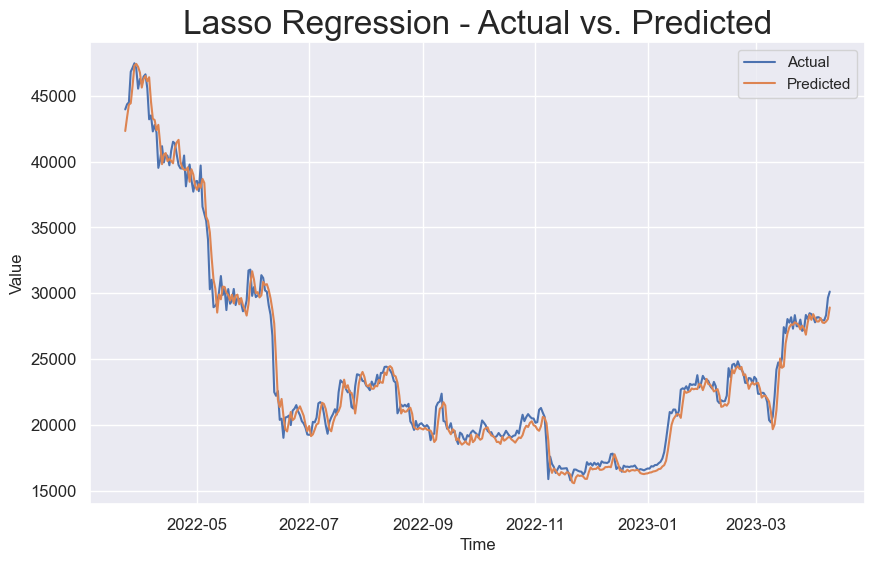

CPU times: user 2min 37s, sys: 16min 16s, total: 18min 54s
Wall time: 1min 43s


,params,mean_test_score,rank_test_score
99,{'alpha': 20.0},-731.539661,1
98,{'alpha': 19.7979797979798},-731.615144,2
97,{'alpha': 19.595959595959595},-731.692253,3
96,{'alpha': 19.393939393939394},-731.770092,4
95,{'alpha': 19.19191919191919},-731.848796,5
94,{'alpha': 18.98989898989899},-731.928487,6
93,{'alpha': 18.78787878787879},-732.009168,7
92,{'alpha': 18.585858585858585},-732.091164,8
91,{'alpha': 18.383838383838384},-732.174417,9
90,{'alpha': 18.18181818181818},-732.259508,10


In [8]:
%%time
# Create a Lasso regression model
lasso = Lasso()

# Define the parameter grid for grid search
param_grid = {'alpha':  np.linspace(0, 20, num = 100)}

# Use TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameter from grid search
best_lasso = grid_search.best_params_

# Train the Lasso model with the best parameter on the entire training set
lasso_best = Lasso(alpha=best_lasso['alpha'])
lasso_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lasso_best.predict(x_test)

# Calculate and print the Mean Squared Error on the test set
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error on test set: {lasso_rmse}')

# Plot the actual vs. predicted values
lasso_pred = pd.DataFrame(y_test)
lasso_pred['pred'] = y_pred
plt.figure(figsize=(10, 6))

plt.plot(lasso_pred.Bitcoin_Close, label='Actual')
plt.plot(lasso_pred.pred, label='Predicted')
plt.title('Lasso Regression - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

results = grid_search.cv_results_
top_results = pd.DataFrame(results).sort_values(by='rank_test_score').head(10)

# Display the relevant columns
columns_to_display = ['params', 'mean_test_score', 'rank_test_score']
top_results[columns_to_display]

In [9]:
print(grid_search.best_params_)

{'alpha': 20.0}


## Ridge

Root Mean Squared Error on test set: 891.0429963444955


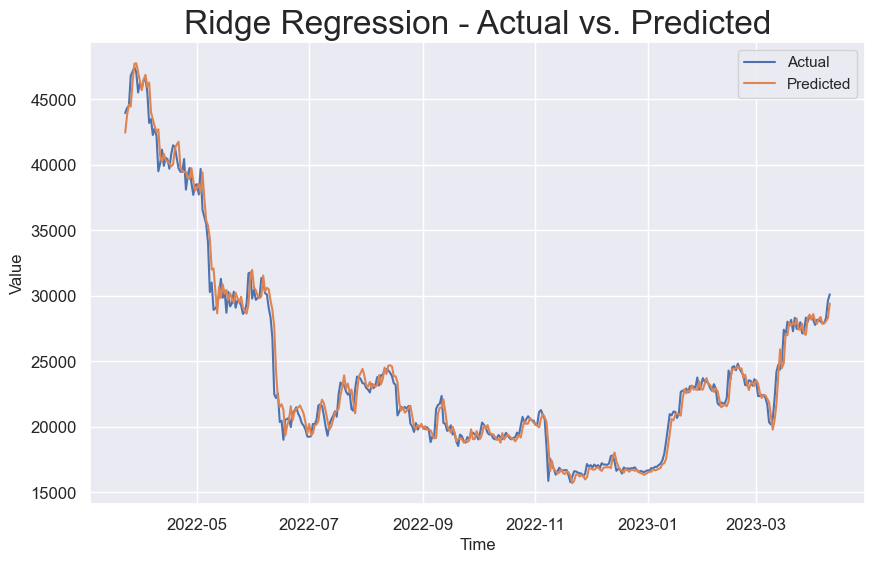

CPU times: user 6.24 s, sys: 23.3 s, total: 29.5 s
Wall time: 2.72 s


,params,mean_test_score,rank_test_score
99,{'alpha': 20.0},-752.490560,1
98,{'alpha': 19.7979797979798},-752.580880,2
97,{'alpha': 19.595959595959595},-752.672302,3
96,{'alpha': 19.393939393939394},-752.764849,4
95,{'alpha': 19.19191919191919},-752.858546,5
94,{'alpha': 18.98989898989899},-752.953419,6
93,{'alpha': 18.78787878787879},-753.049494,7
92,{'alpha': 18.585858585858585},-753.146799,8
91,{'alpha': 18.383838383838384},-753.245361,9
90,{'alpha': 18.18181818181818},-753.345210,10


In [10]:
%%time
# Create a Ridge regression model
ridge = Ridge()

# Define the parameter grid for grid search
param_grid = {'alpha': np.linspace(0, 20, num = 100)}

# Use TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameter from grid search
best_ridge = grid_search.best_params_

# Train the Ridge model with the best parameter on the entire training set
ridge_best = Ridge(alpha=best_ridge['alpha'])
ridge_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ridge_best.predict(x_test)

# Calculate and print the Mean Squared Error on the test set
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error on test set: {ridge_rmse}')

# Plot the actual vs. predicted values
ridge_pred = pd.DataFrame(y_test)
ridge_pred['pred'] = y_pred
plt.figure(figsize=(10, 6))

plt.plot(ridge_pred.Bitcoin_Close, label='Actual')
plt.plot(ridge_pred.pred, label='Predicted')
plt.title('Ridge Regression - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

results = grid_search.cv_results_

# for i in range(len(results['params'])):
#     print(f"Iteration {i+1}:")
#     print(f"Parameters: {results['params'][i]}")
#     print(f"Mean Test Score: {results['mean_test_score'][i]}")
#     print(f"Rank: {results['rank_test_score'][i]}")
#     print("\n")
top_results = pd.DataFrame(results).sort_values(by='rank_test_score').head(10)

# Display the relevant columns
columns_to_display = ['params', 'mean_test_score', 'rank_test_score']
top_results[columns_to_display]

In [11]:
print(grid_search.best_params_)

{'alpha': 20.0}


## Elastic Net

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/pyth

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.946e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.963e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.275e+07, tolerance: 2.787e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.933e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.271e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.283e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+08, tolerance: 1.034e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.298e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.281e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.257e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.295e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.952e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.417e+04, tolerance: 4.022e+03
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.531e+04, tolerance: 4.022e+03
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.241e+04, tolerance: 4.022e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.952e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.440e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.381e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.271e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+08, tolerance: 1.034e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.285e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.927e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.235e+07, tolerance: 2.787e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.923e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.244e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.721e+04, tolerance: 4.022e+03
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.953e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.441e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.915e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.923e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.283e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.915e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.539e+04, tolerance: 4.022e+03
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.331e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+07, tolerance: 5.108e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+04, tolerance: 4.022e+03
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.431e+05, tolerance: 2.559e+04
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.242e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.265e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.278e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+08, tolerance: 1.034e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.275e+04, tolerance: 4.022e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e+07, tolerance: 2.787e+06
  model = cd_fast.enet_coordinate_descent(
/Users/dy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: C

{'alpha': 0.0, 'l1_ratio': 0.0}
Root Mean Squared Error on test set: 2278.8487364540674


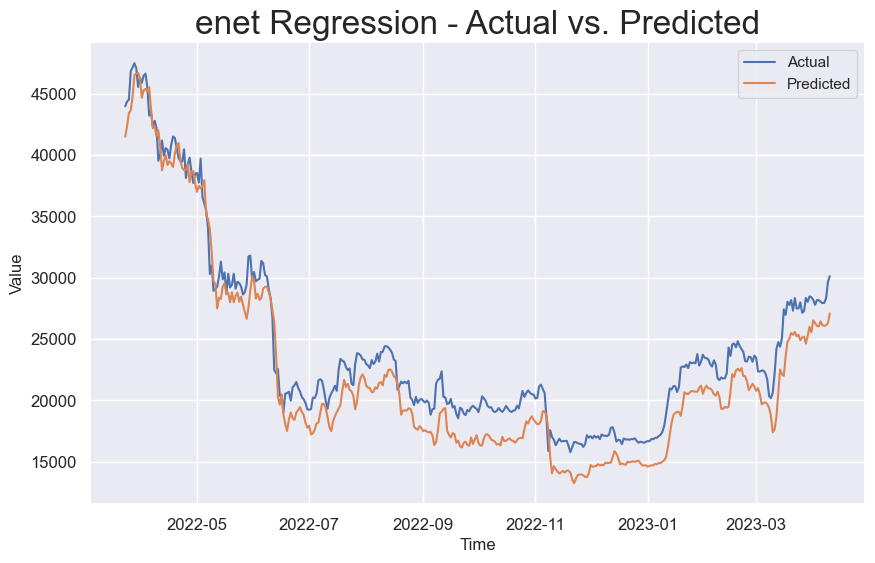

CPU times: user 1.81 s, sys: 2.59 s, total: 4.39 s
Wall time: 7.03 s


,params,mean_test_score,rank_test_score
0,"{'alpha': 0.0, 'l1_ratio': 0.0}",-914.151661,1
1,"{'alpha': 0.0, 'l1_ratio': 0.1}",-914.151661,1
2,"{'alpha': 0.0, 'l1_ratio': 0.2}",-914.151661,1
3,"{'alpha': 0.0, 'l1_ratio': 0.30000000000000004}",-914.151661,1
4,"{'alpha': 0.0, 'l1_ratio': 0.4}",-914.151661,1
5,"{'alpha': 0.0, 'l1_ratio': 0.5}",-914.151661,1
6,"{'alpha': 0.0, 'l1_ratio': 0.6000000000000001}",-914.151661,1
7,"{'alpha': 0.0, 'l1_ratio': 0.7000000000000001}",-914.151661,1
8,"{'alpha': 0.0, 'l1_ratio': 0.8}",-914.151661,1
9,"{'alpha': 0.0, 'l1_ratio': 0.9}",-914.151661,1


In [27]:
%%time
param_grid = {'alpha': np.linspace(0, 10, 50), 
              'l1_ratio': np.linspace(0, 1, 11)}


# Use TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

cv_enet = ElasticNet(fit_intercept = False, random_state = 567)
grid_search = GridSearchCV(cv_enet, param_grid, cv = tscv,
                         scoring = 'neg_root_mean_squared_error',
                          n_jobs = -1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_enet = grid_search.best_params_

# Train the enet model with the best parameter on the entire training set
enet_best = ElasticNet(fit_intercept = False, random_state = 567,
                       alpha=best_enet['alpha'], l1_ratio=best_enet['l1_ratio'])
enet_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = enet_best.predict(x_test)

# Calculate and print the Mean Squared Error on the test set
enet_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
enet_r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error on test set: {enet_rmse}')

# Plot the actual vs. predicted values
enet_pred = pd.DataFrame(y_test)
enet_pred['pred'] = y_pred
plt.figure(figsize=(10, 6))

plt.plot(enet_pred.Bitcoin_Close, label='Actual')
plt.plot(enet_pred.pred, label='Predicted')
plt.title('enet Regression - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

results = grid_search.cv_results_

# for i in range(len(results['params'])):
#     print(f"Iteration {i+1}:")
#     print(f"Parameters: {results['params'][i]}")
#     print(f"Mean Test Score: {results['mean_test_score'][i]}")
#     print(f"Rank: {results['rank_test_score'][i]}")
#     print("\n")
top_results = pd.DataFrame(results).sort_values(by='rank_test_score').head(10)

# Display the relevant columns
columns_to_display = ['params', 'mean_test_score', 'rank_test_score']
top_results[columns_to_display]

In [28]:
print(grid_search.best_params_)

{'alpha': 0.0, 'l1_ratio': 0.0}


## Random Forest

In [14]:
y = df['Bitcoin_Close']
x = df.drop(columns='Bitcoin_Close')

# Split the data into training and testing sets
x_train, x_test = x[:'2022-03-23'], x['2022-03-23':]
y_train, y_test = y[:'2022-03-23'], y['2022-03-23':]

Mean Squared Error on test set: 1709.4534613266871


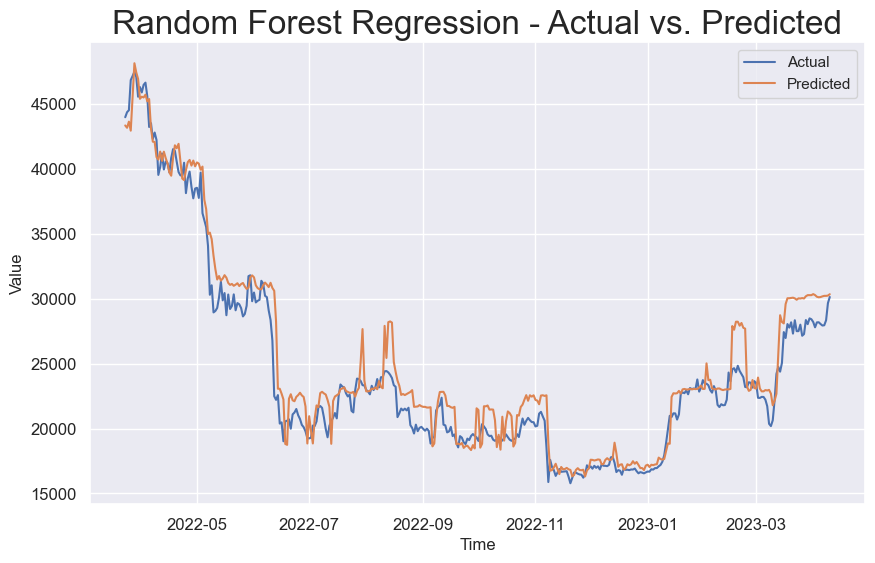

CPU times: user 24.3 s, sys: 5.32 s, total: 29.6 s
Wall time: 48.7 s


In [15]:
%%time
rf = RandomForestRegressor(random_state=567, n_jobs=-1)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameters from grid search
best_rf = grid_search.best_params_

# Train the Random Forest model with the best parameters on the entire training set
rf_best = RandomForestRegressor(**best_rf)
rf_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_best.predict(x_test)

# Calculate and print the Mean Squared Error on the test set
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error on test set: {rf_rmse}')

rf_pred = pd.DataFrame(y_test)
rf_pred['pred'] = y_pred

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(rf_pred.Bitcoin_Close, label='Actual')
plt.plot(rf_pred.pred, label='Predicted')
plt.title('Random Forest Regression - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
results = grid_search.cv_results_
top_results = pd.DataFrame(results).sort_values(by='rank_test_score').head(10)

# Display the relevant columns
columns_to_display = ['params', 'mean_test_score', 'rank_test_score']
top_results[columns_to_display]

,params,mean_test_score,rank_test_score
27,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-6733.485049,1
29,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-6751.373846,2
56,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",-6761.217329,3
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6765.233637,4
28,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-6765.653892,5
32,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-6766.641149,6
38,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",-6769.748617,7
11,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-6773.894563,8
59,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",-6777.088426,9
5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6779.166781,10


In [17]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## XGBoost

Mean Squared Error on test set: 1940.5086076232403


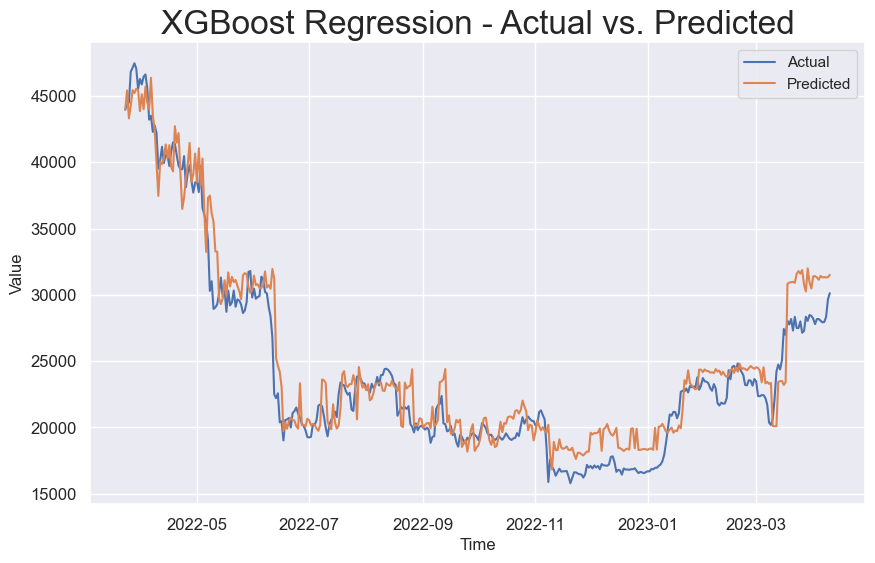

CPU times: user 22min 35s, sys: 19min 50s, total: 42min 26s
Wall time: 3min 54s


,params,mean_test_score,rank_test_score
293,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.327850e+08,1
289,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.329105e+08,2
291,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.329826e+08,3
301,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.356183e+08,4
305,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.356208e+08,5
303,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.356213e+08,6
271,"{'colsample_bytree': 1.0, 'learning_rate': 0.5...",-1.358358e+08,7
295,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.358983e+08,8
150,"{'colsample_bytree': 0.8, 'learning_rate': 0.8...",-1.359407e+08,9
297,"{'colsample_bytree': 1.0, 'learning_rate': 0.6...",-1.359783e+08,10


In [18]:
%%time
xgb = XGBRegressor(random_state = 567, n_jobs=-1)
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 9],
    'learning_rate': np.linspace(0, 1, num = 10),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameters from grid search
best_xgb = grid_search.best_params_

# Train the XGBoost model with the best parameters on the entire training set
xgb_best = XGBRegressor(**best_xgb, random_state = 567, n_jobs=-1)
xgb_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_best.predict(x_test)

# Calculate and print the Mean Squared Error on the test set
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error on test set: {xgb_rmse}')

xgb_pred = pd.DataFrame(y_test)
xgb_pred['pred'] = y_pred

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(xgb_pred.Bitcoin_Close, label='Actual')
plt.plot(xgb_pred.pred, label='Predicted')
plt.title('XGBoost Regression - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

results = grid_search.cv_results_
top_results = pd.DataFrame(results).sort_values(by='rank_test_score').head(10)

# Display the relevant columns
columns_to_display = ['params', 'mean_test_score', 'rank_test_score']
top_results[columns_to_display]

In [19]:
print(grid_search.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.6666666666666666, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


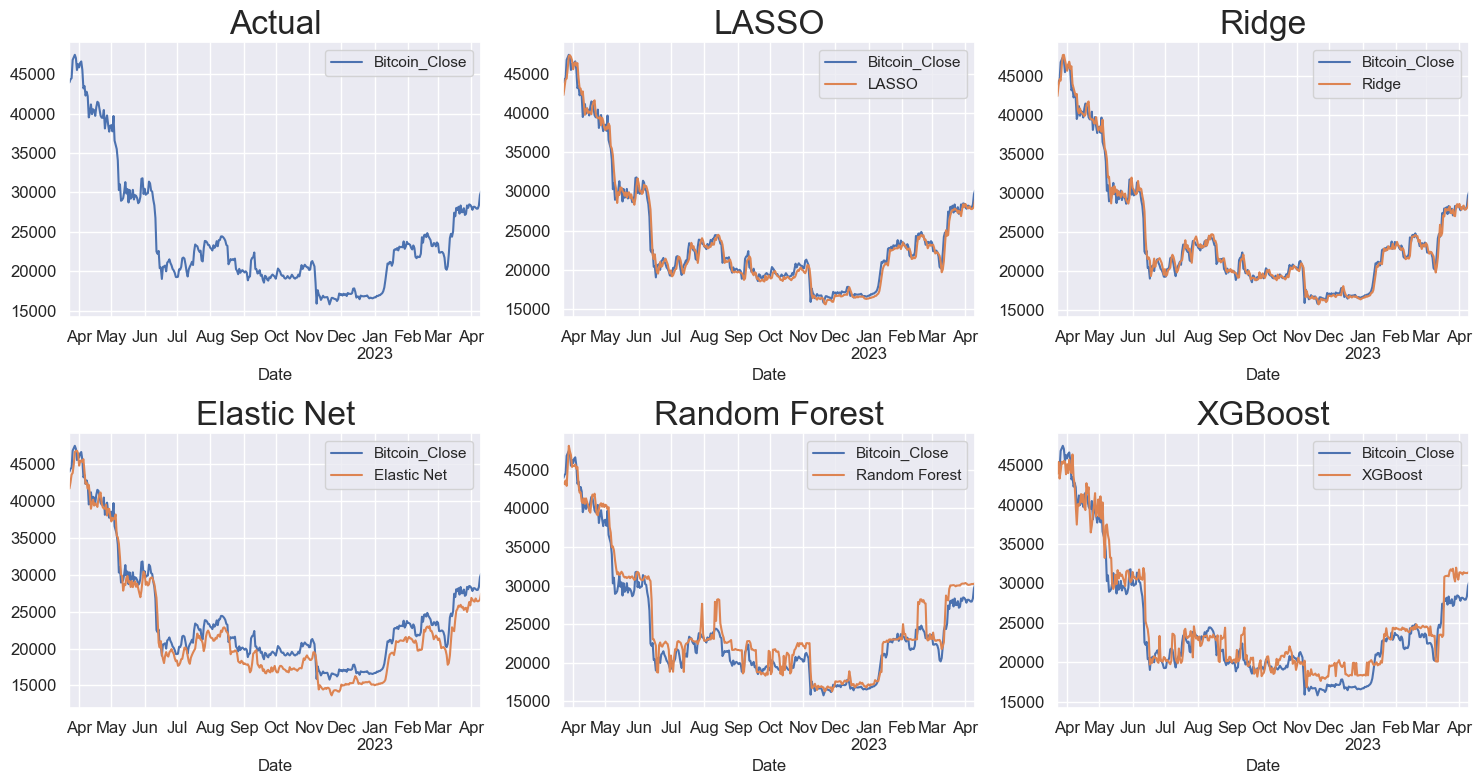

In [20]:
pred = pd.DataFrame(y_test)
pred['LASSO'] = lasso_pred['pred']
pred['Ridge'] = ridge_pred['pred']
pred['Elastic Net'] = enet_pred['pred']
pred['Random Forest'] = rf_pred['pred']
pred['XGBoost'] = xgb_pred['pred']

columns = pred.columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot the first column in every subplot
# pred.plot(y=columns[0], ax=axes[0, 0], title=columns[0])
# axes[0, 0].set_xlabel('Time')
# axes[0, 0].set_ylabel('Value')

# Plot the other five columns in each subplot
for i in range(1, 6):
    row = i // 3
    col = i % 3
    pred.plot(y=columns[0], ax=axes[row, col])
    pred.plot(y=columns[i], ax=axes[row, col], title=columns[i])
    
pred.plot(y=columns[0], ax=axes[0, 0], title='Actual')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
rmse_tbl = np.array([[lasso_rmse, ridge_rmse, enet_rmse, rf_rmse, xgb_rmse]])
print(tabulate(rmse_tbl, headers=['LASSO', 'Ridge', 'Elastic Net', 'Random Forest', 'XGBoost'], tablefmt='github'))

|   LASSO |   Ridge |   Elastic Net |   Random Forest |   XGBoost |
|---------|---------|---------------|-----------------|-----------|
|  964.63 | 891.043 |       2278.85 |         1709.45 |   1940.51 |


In [30]:
r2_tbl = np.array([[lasso_r2, ridge_r2, enet_r2, rf_r2, xgb_r2]])
print(tabulate(r2_tbl, headers=['LASSO', 'Ridge', 'Elastic Net', 'Random Forest', 'XGBoost'], tablefmt='github'))

|    LASSO |   Ridge |   Elastic Net |   Random Forest |   XGBoost |
|----------|---------|---------------|-----------------|-----------|
| 0.983404 | 0.98584 |      0.907379 |        0.947881 |   0.93284 |
